    Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Female   21    1.62    64.0                            yes   no   2.0   
1   Female   21    1.52    56.0                            yes   no   3.0   
2     Male   23    1.80    77.0                            yes   no   2.0   
3     Male   27    1.80    87.0                             no   no   3.0   
4     Male   22    1.78    89.8                             no   no   2.0   
5     Male   29    1.62    53.0                             no  yes   2.0   
6   Female   23    1.50    55.0                            yes  yes   3.0   
7     Male   22    1.64    53.0                             no   no   2.0   
8     Male   24    1.78    64.0                            yes  yes   3.0   
9     Male   22    1.72    68.0                            yes  yes   2.0   
10    Male   26    1.85   105.0                            yes  yes   3.0   
11  Female   21    1.72    80.0                            yes  yes   2.0   

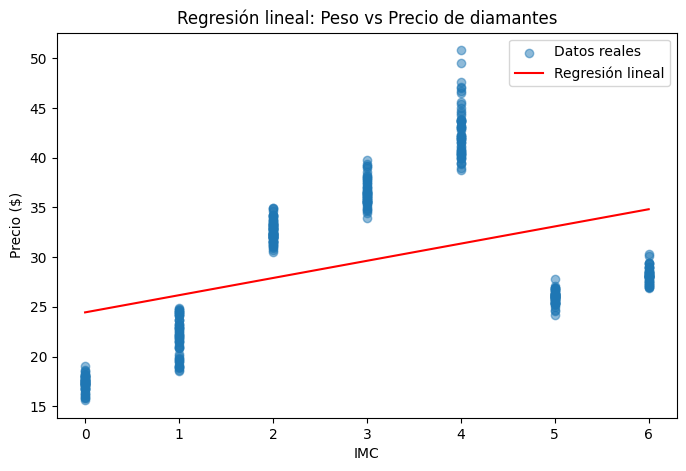

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(df.head(50))

labelEncoder = LabelEncoder()

weight = df['Weight']
height = df['Height']**2

imc = weight / height

df['IMC'] = imc.astype(float)

print(df['IMC'].describe())

df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['SMOKE'] = labelEncoder.fit_transform(df['SMOKE'])
df['family_history_with_overweight'] = labelEncoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = labelEncoder.fit_transform(df['FAVC'])
df['SCC'] = labelEncoder.fit_transform(df['SCC'])
df['CAEC'] = df['CAEC'].apply(lambda x: 1 if x == "no" else (2 if x == "Sometimes" else 0))
df['CALC'] = df['CALC'].apply(lambda x: 1 if x == "no" else (2 if x == "Sometimes" else 0))
df['MTRANS'] = labelEncoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = labelEncoder.fit_transform(df['NObeyesdad'])

X = df[["IMC"]]
y = df["NObeyesdad"]

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, Y_train)

y_pred = modelo.predict(x_test)

#print(y_pred)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
porcentaje_rmse = np.abs(rmse) * 100

print(f"Error absoluto medio: {mae:.2f}$\n", f"Coeficiente de determinación: {r2:.3f}\n", f"Error cuadratico medio: {rmse:.2f}\n", f"porcentaje {porcentaje_rmse}")

#Visualizar la regresión
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(x_test, y_pred, color="red", label="Regresión lineal")
plt.xlabel("IMC")
plt.ylabel("Precio ($)")
plt.title("Regresión lineal: Peso vs Precio de diamantes")
plt.legend()
plt.show()